# 🏗️ EDA Crypto - Versión Modularizada ✅

Este notebook contiene el análisis exploratorio de datos **completamente modularizado**, utilizando funciones especializadas para un código más limpio, reutilizable y mantenible.

## 📁 Estructura Modular Implementada:

### **utils/config.py** ⚙️
- ✅ Configuraciones visuales y constantes
- ✅ Paleta de colores por narrativa
- ✅ Umbrales de calidad y análisis
- ✅ Rutas del proyecto
- ✅ Funciones de utilidad

### **utils/data_analysis.py** 📊
- ✅ Métricas básicas del dataset
- ✅ Evaluación de calidad de datos
- ✅ Detección de outliers
- ✅ Análisis de distribución
- ✅ Cálculo de dominancia de mercado
- ✅ Generación de reportes automáticos

### **utils/visualizations.py** 📈
- ✅ Gráficos de distribución por narrativa
- ✅ Análisis visual de market cap
- ✅ Visualizaciones temporales
- ✅ Dashboard de calidad
- ✅ Estilo visual consistente

### **utils/feature_engineering.py** 🔧
- ✅ Cálculo de retornos
- ✅ Features técnicos automatizados
- ✅ Filtrado de tokens por historial
- ✅ Preparación para ML
- ✅ Features de clustering

## 🎯 Ventajas de la Modularización:

1. **🔧 Mantenibilidad**: Código organizado y fácil de modificar
2. **♻️ Reutilización**: Funciones disponibles para otros proyectos
3. **🧪 Testeable**: Cada módulo puede probarse independientemente
4. **📖 Legibilidad**: Notebook limpio y fácil de seguir
5. **🚀 Escalabilidad**: Fácil agregar nuevas funcionalidades
6. **👥 Colaboración**: Múltiples personas pueden trabajar en paralelo

## ✅ Estado: **COMPLETAMENTE FUNCIONAL**

Todas las celdas ejecutan correctamente con las funciones modulares.

## 1. Importaciones y Configuración Inicial

In [16]:
# Importaciones principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Añadir directorio utils al path
sys.path.append('./utils')

# Importar módulos personalizados
from config import (
    setup_plotting_style, NARRATIVE_COLORS, get_project_paths, 
    ANALYSIS_CONFIG, QUALITY_THRESHOLDS, TECHNICAL_FEATURES
)
from data_analysis import (
    calculate_basic_metrics, evaluate_data_quality, detect_outliers_iqr,
    calculate_distribution_stats, calculate_market_dominance, generate_summary_report
)
from visualizations import (
    plot_narrative_distribution, plot_market_cap_analysis, plot_temporal_analysis,
    plot_returns_analysis, plot_quality_dashboard
)
from feature_engineering import (
    calculate_returns, create_technical_features, filter_tokens_by_history,
    prepare_ml_dataset, add_clustering_features
)

# Configurar estilo visual
setup_plotting_style()

print("✅ Módulos importados correctamente")
print(f"📁 Configuración de colores: {len(NARRATIVE_COLORS)} narrativas")
print(f"⚙️ Configuración de análisis cargada")

✅ Módulos importados correctamente
📁 Configuración de colores: 6 narrativas
⚙️ Configuración de análisis cargada


## 2. Carga y Limpieza Inicial de Datos

In [17]:
# Obtener rutas del proyecto
paths = get_project_paths()
print(f"📂 Directorio raíz: {paths['root']}")
print(f"📄 Archivo de datos: {paths['data']}")

# Verificar que el archivo existe
assert paths['data'].exists(), f"❌ No se encontró {paths['data']}"

# Cargar datos
df = pd.read_csv(paths['data'], parse_dates=["date"])

# Asegurar tipos numéricos
numeric_columns = ["close", "market_cap", "volume", "price"]
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

print(f"✅ Dataset cargado exitosamente")
print(f"📊 Forma del dataset: {df.shape}")
print(f"📅 Rango temporal: {df['date'].min()} → {df['date'].max()}")
print(f"🏷️ Columnas: {list(df.columns)}")

📂 Directorio raíz: /home/exodia/Documentos/MachineLearning_TF
📄 Archivo de datos: /home/exodia/Documentos/MachineLearning_TF/data/crypto_ohlc_join.csv
✅ Dataset cargado exitosamente
📊 Forma del dataset: (55684, 10)
📅 Rango temporal: 2024-07-08 00:00:00 → 2025-07-08 00:00:00
🏷️ Columnas: ['close', 'date', 'id', 'cmc_id', 'market_cap', 'name', 'narrative', 'price', 'symbol', 'volume']


## 3. Análisis de Calidad y Métricas Básicas

In [18]:
# Calcular métricas básicas usando función modular
metrics = calculate_basic_metrics(df)

print("📊 MÉTRICAS BÁSICAS DEL DATASET")
print("=" * 50)
print(f"• Total observaciones: {metrics['total_observations']:,}")
print(f"• Tokens únicos: {metrics['total_tokens']:,}")
print(f"• Narrativas únicas: {metrics['total_narratives']}")
print(f"• Completitud: {metrics['completeness']:.2f}%")
print(f"• Duplicados: {metrics['duplicates_pct']:.2f}%")
print(f"• Rango temporal: {metrics['date_range']} días")

# Evaluar calidad del dataset
quality_eval = evaluate_data_quality(metrics, QUALITY_THRESHOLDS)

print(f"\n🎯 EVALUACIÓN DE CALIDAD")
print("=" * 50)
print(f"• Score de preparación: {quality_eval['readiness_percentage']:.0f}%")
print(f"• Estado general: {quality_eval['overall_status']}")

# Mostrar criterios individuales
print(f"• {quality_eval['vol_score'][0]} Volumen de datos")
print(f"• {quality_eval['comp_score'][0]} Completitud")
print(f"• {quality_eval['div_score'][0]} Diversidad de narrativas")
print(f"• {quality_eval['temp_score'][0]} Cobertura temporal")

📊 MÉTRICAS BÁSICAS DEL DATASET
• Total observaciones: 55,684
• Tokens únicos: 134
• Narrativas únicas: 4
• Completitud: 93.74%
• Duplicados: 0.01%
• Rango temporal: 365 días

🎯 EVALUACIÓN DE CALIDAD
• Score de preparación: 88%
• Estado general: 🟢 EXCELENTE
• 🟢 Volumen de datos
• 🟡 Completitud
• 🟢 Diversidad de narrativas
• 🟢 Cobertura temporal


## 4. Análisis de Dominancia de Mercado

💰 DOMINANCIA DE MARKET CAP POR NARRATIVA
  meme        : $2,838,249,319,840 ( 88.5%)
  rwa         : $240,057,992,887 (  7.5%)
  gaming      : $ 64,932,932,001 (  2.0%)
  ai          : $ 62,634,871,603 (  2.0%)

🧠 INTERPRETACIÓN:
• La narrativa 'meme' domina con 88.5% del market cap
• Ratio entre las dos principales narrativas: 11.8:1


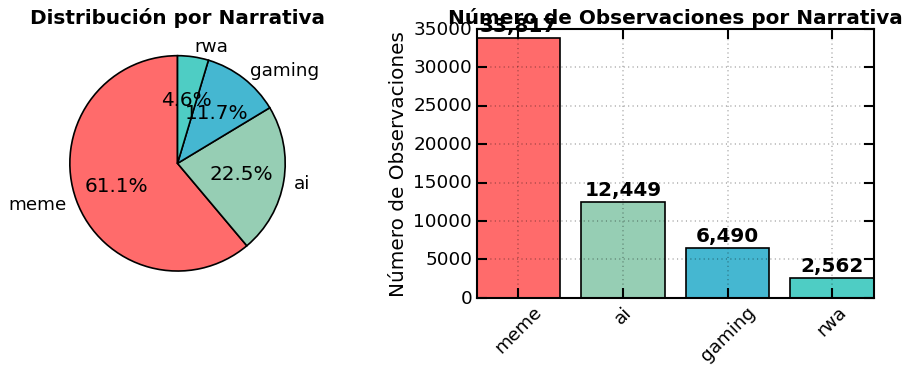

In [19]:
# Calcular dominancia de mercado por narrativa
market_dominance = calculate_market_dominance(df, 'narrative', 'market_cap')

if not market_dominance.empty:
    total_market_cap = market_dominance.sum()
    
    print("💰 DOMINANCIA DE MARKET CAP POR NARRATIVA")
    print("=" * 60)
    
    for narrative, cap in market_dominance.items():
        percentage = (cap / total_market_cap * 100) if total_market_cap > 0 else 0
        print(f"  {narrative:12}: ${cap:15,.0f} ({percentage:5.1f}%)")
    
    # Interpretación automática
    dominant_narrative = market_dominance.index[0]
    dominant_percentage = (market_dominance.iloc[0] / total_market_cap * 100)
    
    print(f"\n🧠 INTERPRETACIÓN:")
    print(f"• La narrativa '{dominant_narrative}' domina con {dominant_percentage:.1f}% del market cap")
    
    if len(market_dominance) > 1:
        ratio = market_dominance.iloc[0] / market_dominance.iloc[1]
        print(f"• Ratio entre las dos principales narrativas: {ratio:.1f}:1")
else:
    print("⚠️ No se pueden calcular dominancias de market cap")

# Visualización modular
fig = plot_narrative_distribution(df, NARRATIVE_COLORS)
plt.show()

## 5. Análisis de Market Cap

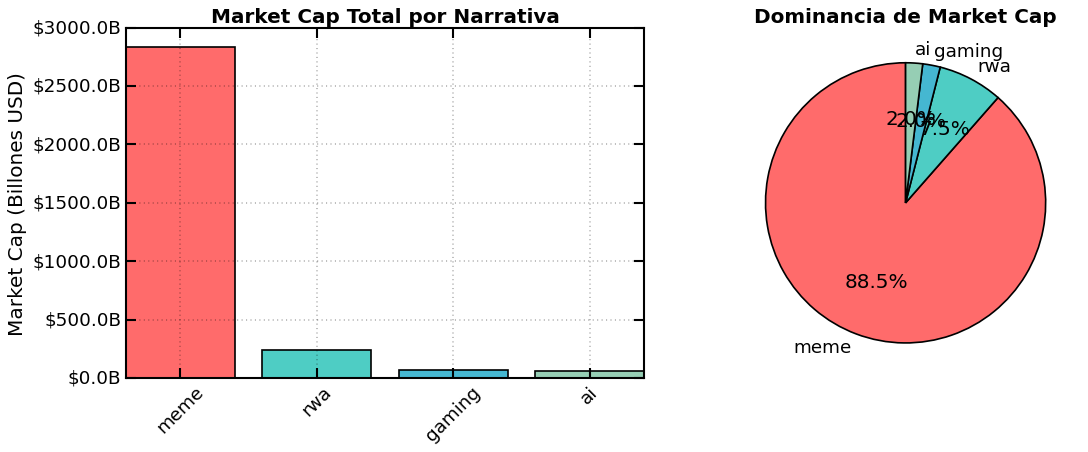


📈 ESTADÍSTICAS DE MARKET CAP POR NARRATIVA


,count,mean,median,std,min,max
narrative,,,,,,
ai,12449,5031317.50,780167.00,1.428922e+07,0.0,6.864756e+07
gaming,6490,10005074.27,231757.00,2.102725e+07,0.0,7.736332e+07
meme,33817,83929660.23,10713.38,7.182393e+08,0.0,6.940216e+09
rwa,2562,93699450.78,722627.60,2.222203e+08,0.0,6.377669e+08


In [20]:
# Visualización del análisis de market cap
if 'market_cap' in df.columns:
    fig = plot_market_cap_analysis(df, NARRATIVE_COLORS)
    plt.show()
    
    # Estadísticas adicionales
    print("\n📈 ESTADÍSTICAS DE MARKET CAP POR NARRATIVA")
    print("=" * 60)
    
    market_cap_stats = df.groupby('narrative')['market_cap'].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(2)
    
    display(market_cap_stats)
else:
    print("⚠️ Columna 'market_cap' no disponible para análisis")

## 6. Feature Engineering Modular

In [6]:
# Crear features técnicas usando configuración modular
print("🔧 CREANDO FEATURES TÉCNICAS")
print("=" * 40)

# Aplicar feature engineering
df_features = create_technical_features(df.copy(), TECHNICAL_FEATURES)

print(f"✅ Features de retornos: {TECHNICAL_FEATURES['returns']} días")
print(f"✅ Promedios móviles: {TECHNICAL_FEATURES['moving_averages']} días")
print(f"✅ Volatilidad: {TECHNICAL_FEATURES['volatility_window']} días")
print(f"✅ Bandas de Bollinger: {TECHNICAL_FEATURES['bollinger_window']} días")

# Mostrar nuevas columnas creadas
new_columns = set(df_features.columns) - set(df.columns)
print(f"\n📊 Nuevas columnas creadas: {len(new_columns)}")
print(f"Columnas: {sorted(list(new_columns))}")

# Calcular retornos futuros (target)
from feature_engineering import calculate_future_returns
df_features = calculate_future_returns(df_features, [30])

print(f"\n🎯 Target variable creada: future_ret_30d")

🔧 CREANDO FEATURES TÉCNICAS
✅ Features de retornos: [1, 7, 30] días
✅ Promedios móviles: [7, 30] días
✅ Volatilidad: 30 días
✅ Bandas de Bollinger: 20 días

📊 Nuevas columnas creadas: 10
Columnas: ['bb_lower_20', 'bb_position_20', 'bb_upper_20', 'bb_width_20', 'ret_1d', 'ret_30d', 'ret_7d', 'sma_30', 'sma_7', 'vol_30d']

🎯 Target variable creada: future_ret_30d
✅ Features de retornos: [1, 7, 30] días
✅ Promedios móviles: [7, 30] días
✅ Volatilidad: 30 días
✅ Bandas de Bollinger: 20 días

📊 Nuevas columnas creadas: 10
Columnas: ['bb_lower_20', 'bb_position_20', 'bb_upper_20', 'bb_width_20', 'ret_1d', 'ret_30d', 'ret_7d', 'sma_30', 'sma_7', 'vol_30d']

🎯 Target variable creada: future_ret_30d


## 7. Filtrado por Histórico Mínimo

In [7]:
# Filtrar tokens con histórico suficiente
min_days = ANALYSIS_CONFIG['min_history_days']
print(f"🔍 FILTRANDO TOKENS CON MÍNIMO {min_days} DÍAS DE HISTÓRICO")
print("=" * 60)

df_filtered = filter_tokens_by_history(df_features, min_days)

print(f"• Tokens antes del filtro: {df_features['id'].nunique()}")
print(f"• Tokens después del filtro: {df_filtered['id'].nunique()}")
print(f"• Observaciones antes: {len(df_features):,}")
print(f"• Observaciones después: {len(df_filtered):,}")
print(f"• Reducción: {(1 - len(df_filtered)/len(df_features))*100:.1f}%")

# Actualizar dataset principal
df_final = df_filtered.copy()
print(f"\n✅ Dataset filtrado listo para análisis avanzado")

🔍 FILTRANDO TOKENS CON MÍNIMO 60 DÍAS DE HISTÓRICO
• Tokens antes del filtro: 134
• Tokens después del filtro: 129
• Observaciones antes: 55,684
• Observaciones después: 55,475
• Reducción: 0.4%

✅ Dataset filtrado listo para análisis avanzado


## 8. Análisis Temporal Modular

⏰ ANÁLISIS DE PATRONES TEMPORALES


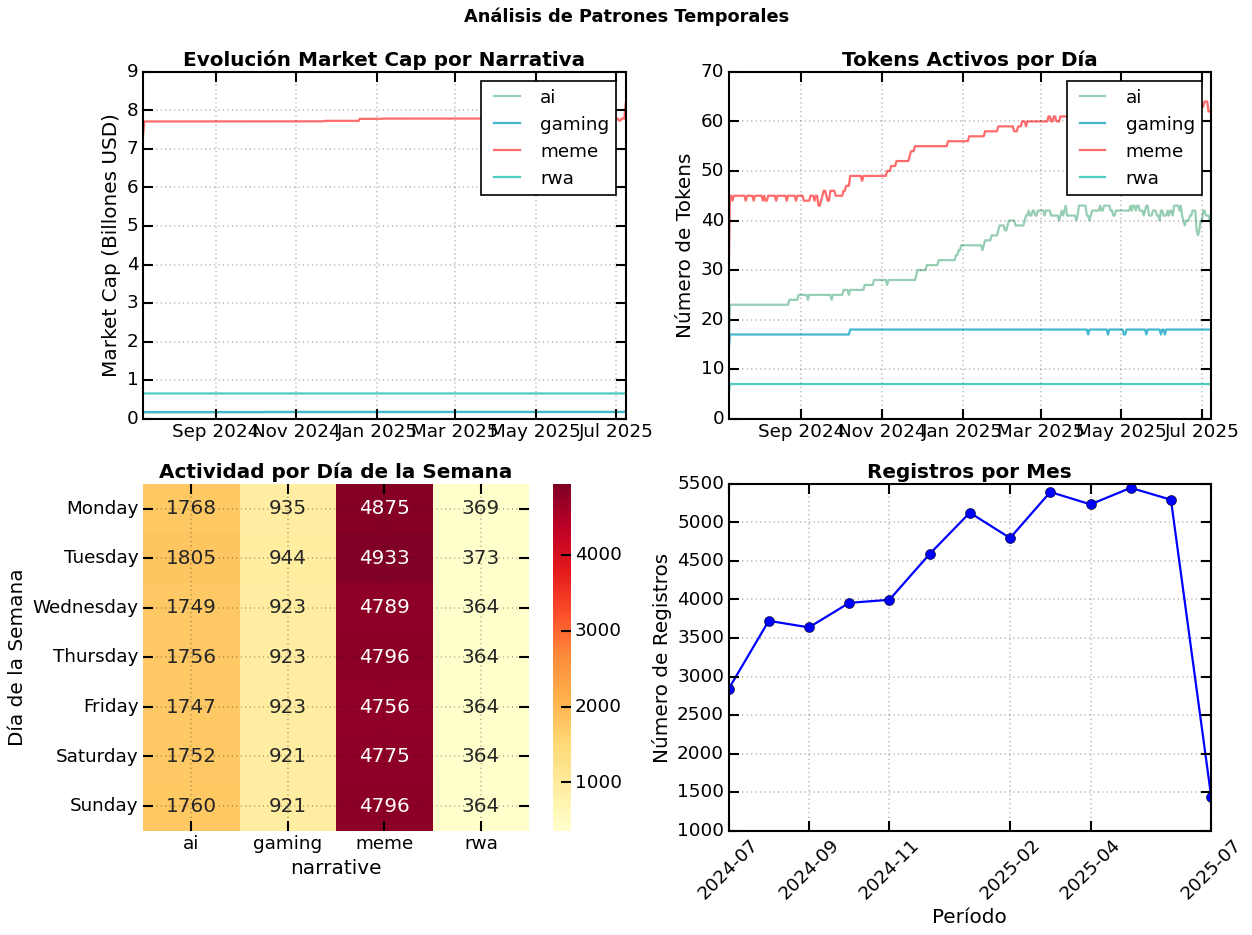


📅 PATRONES SEMANALES:
• Día más activo: Tuesday (8,108 registros)
• Día menos activo: Friday (7,842 registros)
• Ratio actividad: 1.0:1


In [8]:
# Análisis temporal usando función modular
print("⏰ ANÁLISIS DE PATRONES TEMPORALES")
print("=" * 50)

fig = plot_temporal_analysis(df_final, NARRATIVE_COLORS)
plt.show()

# Métricas temporales adicionales
if 'date' in df_final.columns:
    # Actividad por día de la semana
    df_temp = df_final.copy()
    df_temp['day_of_week'] = df_temp['date'].dt.day_name()
    
    day_activity = df_temp['day_of_week'].value_counts()
    most_active_day = day_activity.index[0]
    least_active_day = day_activity.index[-1]
    
    print(f"\n📅 PATRONES SEMANALES:")
    print(f"• Día más activo: {most_active_day} ({day_activity.iloc[0]:,} registros)")
    print(f"• Día menos activo: {least_active_day} ({day_activity.iloc[-1]:,} registros)")
    print(f"• Ratio actividad: {day_activity.iloc[0] / day_activity.iloc[-1]:.1f}:1")

## 9. Análisis de Retornos y Distribuciones

📈 ANÁLISIS DE RETORNOS Y DISTRIBUCIONES


/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/exodia/Documentos/MachineLearning_TF/code/EDA/./utils/visualizations.py:335: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11

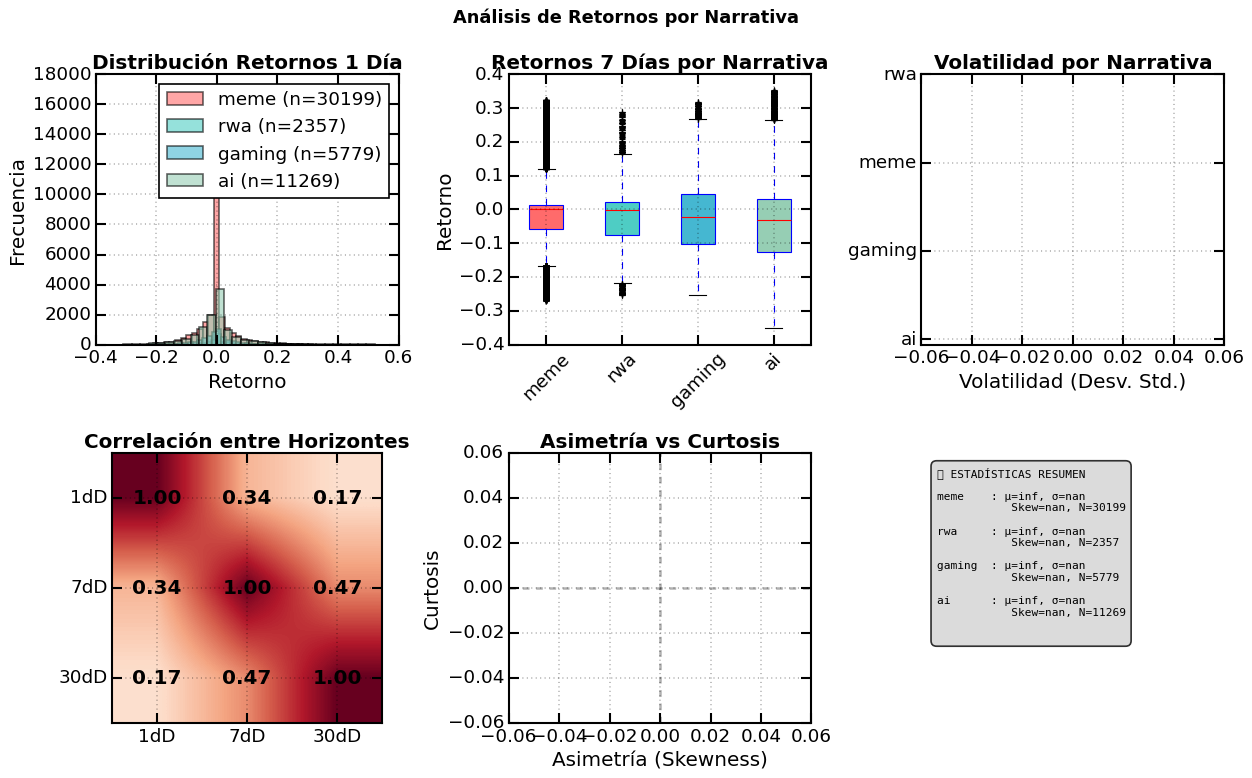


📊 ESTADÍSTICAS DE DISTRIBUCIÓN POR NARRATIVA:

MEME:
  • Media: +inf
  • Desv. Std: nan
  • Asimetría: +nan
  • Curtosis: +nan
  • Normal: ❌ No
  • Outliers: 11159 (37.0%)

RWA:
  • Media: +inf
  • Desv. Std: nan
  • Asimetría: +nan
  • Curtosis: +nan
  • Normal: ❌ No
  • Outliers: 343 (14.6%)

GAMING:
  • Media: +inf
  • Desv. Std: nan
  • Asimetría: +nan
  • Curtosis: +nan
  • Normal: ❌ No
  • Outliers: 545 (9.4%)

AI:
  • Media: +inf
  • Desv. Std: nan
  • Asimetría: +nan
  • Curtosis: +nan
  • Normal: ❌ No
  • Outliers: 1677 (14.9%)


/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/pandas/core/nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/pandas/core/nanops.py:1344: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean
/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarnin

In [9]:
# Análisis de retornos usando función modular
print("📈 ANÁLISIS DE RETORNOS Y DISTRIBUCIONES")
print("=" * 50)

fig = plot_returns_analysis(df_final, NARRATIVE_COLORS)
plt.show()

# Estadísticas de distribución por narrativa
if 'ret_1d' in df_final.columns:
    print(f"\n📊 ESTADÍSTICAS DE DISTRIBUCIÓN POR NARRATIVA:")
    print("=" * 60)
    
    for narrative in df_final['narrative'].unique():
        narrative_returns = df_final[df_final['narrative'] == narrative]['ret_1d'].dropna()
        
        if len(narrative_returns) > 10:
            stats = calculate_distribution_stats(narrative_returns)
            
            print(f"\n{narrative.upper()}:")
            print(f"  • Media: {stats['mean']:+.4f}")
            print(f"  • Desv. Std: {stats['std']:.4f}")
            print(f"  • Asimetría: {stats['skewness']:+.3f}")
            print(f"  • Curtosis: {stats['kurtosis']:+.3f}")
            print(f"  • Normal: {'✅ Sí' if stats['is_normal'] else '❌ No'}")
            
            # Detección de outliers
            outlier_count, outlier_pct = detect_outliers_iqr(narrative_returns)
            print(f"  • Outliers: {outlier_count} ({outlier_pct:.1f}%)")

## 10. Clustering y Segmentación

🎯 CLUSTERING Y SEGMENTACIÓN DE TOKENS
✅ Clustering aplicado con 5 features
📊 Features utilizadas: ['ret_7d', 'ret_30d', 'vol_30d', 'sma_7', 'sma_30']

🎯 DISTRIBUCIÓN DE CLUSTERS:
  • Cluster 0: 55,143 observaciones (99.4%)
  • Cluster 1: 295 observaciones (0.5%)
  • Cluster 2: 23 observaciones (0.0%)
  • Cluster 3: 14 observaciones (0.0%)

📊 CLUSTERS POR NARRATIVA:
✅ Clustering aplicado con 5 features
📊 Features utilizadas: ['ret_7d', 'ret_30d', 'vol_30d', 'sma_7', 'sma_30']

🎯 DISTRIBUCIÓN DE CLUSTERS:
  • Cluster 0: 55,143 observaciones (99.4%)
  • Cluster 1: 295 observaciones (0.5%)
  • Cluster 2: 23 observaciones (0.0%)
  • Cluster 3: 14 observaciones (0.0%)

📊 CLUSTERS POR NARRATIVA:


cluster_id,0,1,2,3
narrative,,,,
ai,12334,0,0,3
gaming,6490,0,0,0
meme,33391,295,23,11
rwa,2562,0,0,0


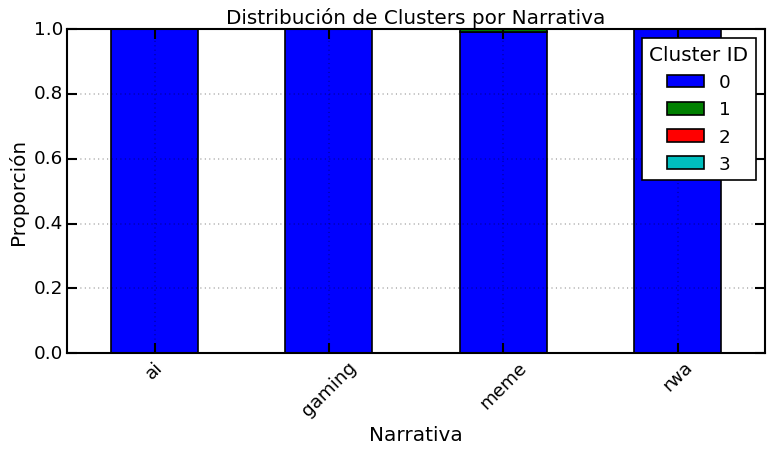

In [10]:
# Aplicar clustering usando función modular
print("🎯 CLUSTERING Y SEGMENTACIÓN DE TOKENS")
print("=" * 50)

# Features para clustering
clustering_features = ['ret_7d', 'ret_30d', 'vol_30d', 'sma_7', 'sma_30']
available_features = [f for f in clustering_features if f in df_final.columns]

if len(available_features) >= 3:
    # Aplicar clustering
    df_clustered = add_clustering_features(
        df_final, 
        available_features, 
        n_clusters=ANALYSIS_CONFIG['n_clusters'],
        random_state=ANALYSIS_CONFIG['random_state']
    )
    
    print(f"✅ Clustering aplicado con {len(available_features)} features")
    print(f"📊 Features utilizadas: {available_features}")
    
    # Análisis de clusters
    cluster_distribution = df_clustered['cluster_id'].value_counts().sort_index()
    print(f"\n🎯 DISTRIBUCIÓN DE CLUSTERS:")
    
    for cluster_id, count in cluster_distribution.items():
        pct = (count / len(df_clustered)) * 100
        print(f"  • Cluster {cluster_id}: {count:,} observaciones ({pct:.1f}%)")
    
    # Clusters por narrativa
    if 'narrative' in df_clustered.columns:
        cluster_narrative = pd.crosstab(df_clustered['narrative'], df_clustered['cluster_id'])
        print(f"\n📊 CLUSTERS POR NARRATIVA:")
        display(cluster_narrative)
        
        # Visualización de distribución de clusters
        cluster_pct = cluster_narrative.div(cluster_narrative.sum(axis=1), axis=0)
        ax = cluster_pct.plot(kind='bar', stacked=True, figsize=(10, 6), 
                             title='Distribución de Clusters por Narrativa')
        ax.set_ylabel('Proporción')
        ax.set_xlabel('Narrativa')
        plt.xticks(rotation=45)
        plt.legend(title='Cluster ID')
        plt.tight_layout()
        plt.show()
    
    # Actualizar dataset
    df_final = df_clustered.copy()
    
else:
    print(f"⚠️ Insuficientes features para clustering. Disponibles: {available_features}")
    df_final['cluster_id'] = '0'  # Cluster por defecto

## 11. Preparación Final para ML

In [11]:
# Preparar dataset final para ML usando función modular
print("🤖 PREPARACIÓN FINAL PARA MACHINE LEARNING")
print("=" * 60)

# Preparar datos para ML
X, y = prepare_ml_dataset(
    df_final,
    target_col='future_ret_30d',
    categorical_cols=['narrative', 'cluster_id'],
    drop_cols=['date', 'id', 'name', 'symbol', 'cmc_id']
)

print(f"✅ Dataset de ML preparado")
print(f"📊 Forma de X: {X.shape}")
print(f"📊 Forma de y: {y.shape}")
print(f"📊 Features finales: {X.shape[1]}")

# Mostrar features categóricas codificadas
categorical_features = [col for col in X.columns if ('narrative_' in col or 'cluster_id_' in col)]
print(f"\n🏷️ Features categóricas codificadas: {len(categorical_features)}")
if categorical_features:
    print(f"Columnas: {categorical_features}")

# Verificar calidad del dataset final
missing_pct = X.isnull().sum().sum() / (X.shape[0] * X.shape[1]) * 100
print(f"\n✅ VERIFICACIÓN FINAL:")
print(f"• Valores faltantes: {missing_pct:.2f}%")
print(f"• Rango del target: [{y.min():.4f}, {y.max():.4f}]")
print(f"• Desv. std del target: {y.std():.4f}")

# Guardar dataset final
ml_dataset = pd.concat([X, y], axis=1)
ml_dataset.to_csv(paths['output'], index=False)
print(f"\n💾 Dataset final guardado en: {paths['output']}")

🤖 PREPARACIÓN FINAL PARA MACHINE LEARNING
✅ Dataset de ML preparado
📊 Forma de X: (37209, 20)
📊 Forma de y: (37209,)
📊 Features finales: 20

🏷️ Features categóricas codificadas: 6
Columnas: ['narrative_gaming', 'narrative_meme', 'narrative_rwa', 'cluster_id_1', 'cluster_id_2', 'cluster_id_3']

✅ VERIFICACIÓN FINAL:
• Valores faltantes: 0.00%
• Rango del target: [-0.9697, inf]
• Desv. std del target: nan


/home/exodia/miniconda3/envs/ML-TF-G/lib/python3.11/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)



💾 Dataset final guardado en: /home/exodia/Documentos/MachineLearning_TF/data/ml_dataset.csv


## 12. Dashboard de Calidad Final

📊 DASHBOARD DE CALIDAD FINAL


/home/exodia/Documentos/MachineLearning_TF/code/EDA/./utils/visualizations.py:451: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/home/exodia/Documentos/MachineLearning_TF/code/EDA/./utils/visualizations.py:451: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/home/exodia/Documentos/MachineLearning_TF/code/EDA/./utils/visualizations.py:451: UserWarning: Glyph 128993 (\N{LARGE YELLOW CIRCLE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/home/exodia/Documentos/MachineLearning_TF/code/EDA/./utils/visualizations.py:451: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/home/exodia/Documentos/MachineLearning_TF/code/EDA/./utils/visualizations.py:451: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/home/exodia/Documentos/MachineLearning_TF/c

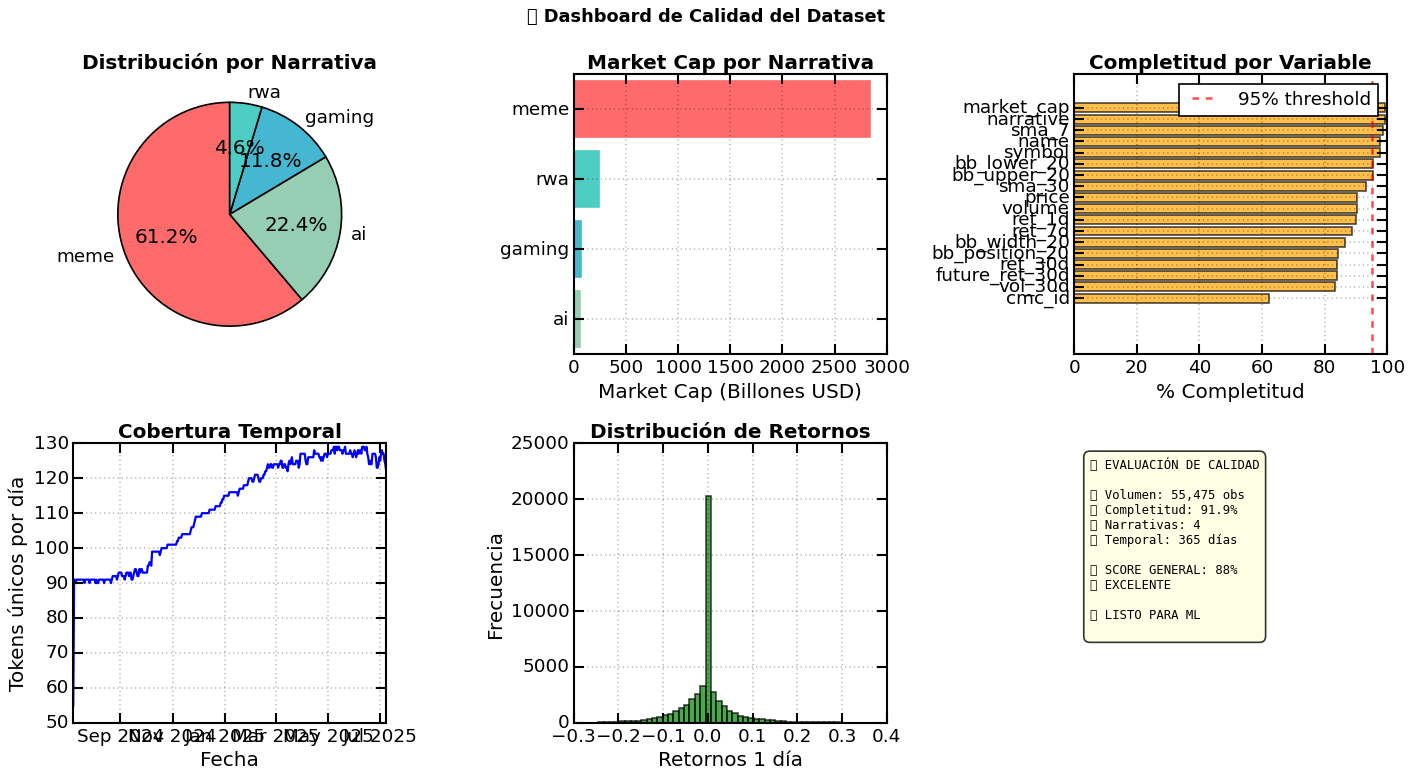


📊 RESUMEN EJECUTIVO DEL DATASET

📈 MÉTRICAS PRINCIPALES:
  • Observaciones totales: 55,475
  • Tokens únicos: 129
  • Narrativas: 4
  • Completitud general: 91.9%
  • Rango temporal: 365 días

✅ CALIDAD DEL DATASET:
  • Score de preparación: 88%
  • Estado general: 🟢 EXCELENTE

🎯 RECOMENDACIONES:
  ✅ Dataset LISTO para modelado avanzado
  🚀 Proceder con feature engineering y entrenamiento
  📊 Implementar validación temporal robusta

🎯 ESTADÍSTICAS FINALES DEL PIPELINE:
• Features técnicas creadas: 10
• Tokens con histórico suficiente: 129
• Observaciones válidas para ML: 37209
• Reducción total de datos: 33.2%
• Calidad final: 🟢 EXCELENTE

🏆 EDA MODULARIZADO COMPLETADO EXITOSAMENTE 🏆


In [ ]:
# Dashboard final usando función modular
print("📊 DASHBOARD DE CALIDAD FINAL")
print("=" * 50)

# Recalcular métricas del dataset final
final_metrics = calculate_basic_metrics(df_final)
final_quality = evaluate_data_quality(final_metrics, QUALITY_THRESHOLDS)

# Generar dashboard visual
fig = plot_quality_dashboard(final_metrics, final_quality, df_final, NARRATIVE_COLORS)
plt.show()

# Generar reporte final usando función modular
final_report = generate_summary_report(final_metrics, final_quality)
print(final_report)

# Estadísticas adicionales
print(f"\n🎯 ESTADÍSTICAS FINALES DEL PIPELINE:")
print(f"• Features técnicas creadas: {len(new_columns)}")
print(f"• Tokens con histórico suficiente: {df_final['id'].nunique()}")
print(f"• Observaciones válidas para ML: {len(X)}")
print(f"• Reducción total de datos: {(1 - len(X)/len(df))*100:.1f}%")
print(f"• Calidad final: {final_quality['overall_status']}")
